# K-Means Clustering

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

## Importing the dataset

In [ ]:
dataset= pd.read_csv('Mall_Customers.csv')
x= dataset.iloc[:, 2:].values

## Using the elbow method to find the optimal number of clusters

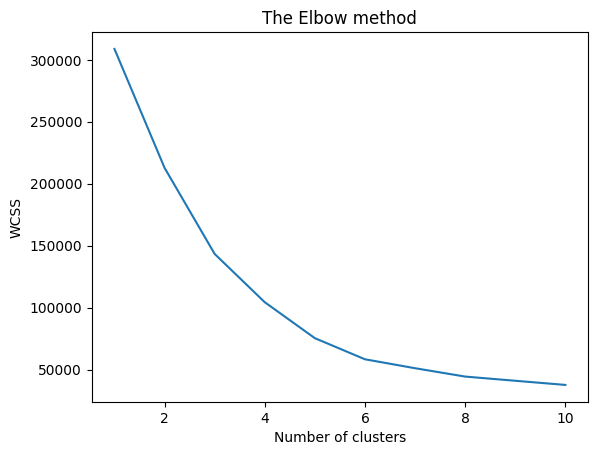

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11):
  kmeans= KMeans(n_clusters= i, init="k-means++", random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [ ]:
kmeans= KMeans(n_clusters= 5, init="k-means++", random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
dataset['Cluster'] = y_kmeans
dataset.to_csv('data_clusters.csv', index=False)


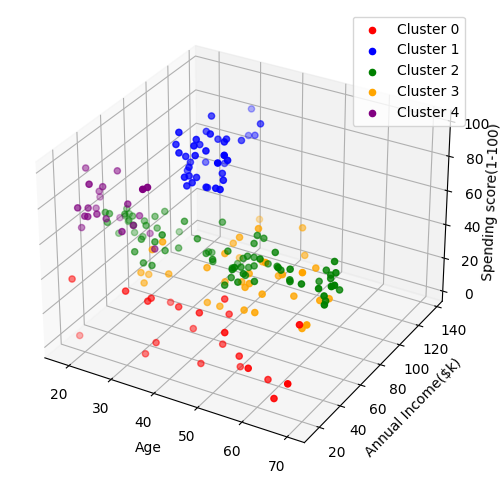

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have a dataframe named 'df' with the cluster labels in the 'Cluster' column

# Create a 3D scatter plot
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each cluster
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Iterate over each cluster
for cluster_label, color in zip(range(5), colors):
    cluster_data = dataset[dataset['Cluster'] == cluster_label]
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               c=color, label=f'Cluster {cluster_label}')

# Set axis labels
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income($k)')
ax.set_zlabel('Spending score(1-100)', rotation=90)  # Rotate the z-axis label
ax.zaxis.labelpad = -0.9  # Adjust the z-axis label position

# Set legend
ax.legend()

# Show the 3D scatter plot
plt.show()



---



---



---



---



---



#  Classification Models

## Importing the dataset

In [ ]:
dataset = pd.read_csv('data_clusters.csv')
dataset = dataset.drop('Spending Score (1-100)', axis=1)
x = dataset.iloc[:, 1:-1].values
y= dataset.iloc[:, -1].values

In [ ]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Cluster'], dtype='object')

In [ ]:
x

array([['Male', 19, 15],
       ['Male', 21, 15],
       ['Female', 20, 16],
       ['Female', 23, 16],
       ['Female', 31, 17],
       ['Female', 22, 17],
       ['Female', 35, 18],
       ['Female', 23, 18],
       ['Male', 64, 19],
       ['Female', 30, 19],
       ['Male', 67, 19],
       ['Female', 35, 19],
       ['Female', 58, 20],
       ['Female', 24, 20],
       ['Male', 37, 20],
       ['Male', 22, 20],
       ['Female', 35, 21],
       ['Male', 20, 21],
       ['Male', 52, 23],
       ['Female', 35, 23],
       ['Male', 35, 24],
       ['Male', 25, 24],
       ['Female', 46, 25],
       ['Male', 31, 25],
       ['Female', 54, 28],
       ['Male', 29, 28],
       ['Female', 45, 28],
       ['Male', 35, 28],
       ['Female', 40, 29],
       ['Female', 23, 29],
       ['Male', 60, 30],
       ['Female', 21, 30],
       ['Male', 53, 33],
       ['Male', 18, 33],
       ['Female', 49, 33],
       ['Female', 21, 33],
       ['Female', 42, 34],
       ['Female', 30, 34],
      

## Encoding Categorical Variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [0])], remainder = "passthrough")
x = np.array(ct.fit_transform(x))

In [ ]:
x

array([[0.0, 1.0, 19, 15],
       [0.0, 1.0, 21, 15],
       [1.0, 0.0, 20, 16],
       [1.0, 0.0, 23, 16],
       [1.0, 0.0, 31, 17],
       [1.0, 0.0, 22, 17],
       [1.0, 0.0, 35, 18],
       [1.0, 0.0, 23, 18],
       [0.0, 1.0, 64, 19],
       [1.0, 0.0, 30, 19],
       [0.0, 1.0, 67, 19],
       [1.0, 0.0, 35, 19],
       [1.0, 0.0, 58, 20],
       [1.0, 0.0, 24, 20],
       [0.0, 1.0, 37, 20],
       [0.0, 1.0, 22, 20],
       [1.0, 0.0, 35, 21],
       [0.0, 1.0, 20, 21],
       [0.0, 1.0, 52, 23],
       [1.0, 0.0, 35, 23],
       [0.0, 1.0, 35, 24],
       [0.0, 1.0, 25, 24],
       [1.0, 0.0, 46, 25],
       [0.0, 1.0, 31, 25],
       [1.0, 0.0, 54, 28],
       [0.0, 1.0, 29, 28],
       [1.0, 0.0, 45, 28],
       [0.0, 1.0, 35, 28],
       [1.0, 0.0, 40, 29],
       [1.0, 0.0, 23, 29],
       [0.0, 1.0, 60, 30],
       [1.0, 0.0, 21, 30],
       [0.0, 1.0, 53, 33],
       [0.0, 1.0, 18, 33],
       [1.0, 0.0, 49, 33],
       [1.0, 0.0, 21, 33],
       [1.0, 0.0, 42, 34],
 

In [ ]:
import statsmodels.api as sm

def calculate_p_values(data):

    dataset = pd.read_csv('data_clusters.csv')
    dataset = dataset.drop('Spending Score (1-100)', axis=1)
    dataset = pd.get_dummies(dataset, columns=['Genre'], drop_first=True)
    x = dataset.drop(columns=['CustomerID','Cluster'])
    y = dataset['Cluster']
    p_values = {}


    for feature in x.columns:
        x_with_constant = sm.add_constant(x[feature])
        model = sm.OLS(y, x_with_constant)
        results = model.fit()
        p_values[feature] = results.pvalues[1]  # Extract p-value from the summary

    return p_values


data = pd.read_csv('data_clusters.csv')
p_values = calculate_p_values(data)

# Print the p-values
for feature, p_value in p_values.items():
    print(f'{feature}: {p_value}')

Age: 0.007244056104409492
Annual Income (k$): 0.9355251657951764
Genre_Male: 0.7728497426435529


In [ ]:
x

array([[0.0, 1.0, 19, 15],
       [0.0, 1.0, 21, 15],
       [1.0, 0.0, 20, 16],
       [1.0, 0.0, 23, 16],
       [1.0, 0.0, 31, 17],
       [1.0, 0.0, 22, 17],
       [1.0, 0.0, 35, 18],
       [1.0, 0.0, 23, 18],
       [0.0, 1.0, 64, 19],
       [1.0, 0.0, 30, 19],
       [0.0, 1.0, 67, 19],
       [1.0, 0.0, 35, 19],
       [1.0, 0.0, 58, 20],
       [1.0, 0.0, 24, 20],
       [0.0, 1.0, 37, 20],
       [0.0, 1.0, 22, 20],
       [1.0, 0.0, 35, 21],
       [0.0, 1.0, 20, 21],
       [0.0, 1.0, 52, 23],
       [1.0, 0.0, 35, 23],
       [0.0, 1.0, 35, 24],
       [0.0, 1.0, 25, 24],
       [1.0, 0.0, 46, 25],
       [0.0, 1.0, 31, 25],
       [1.0, 0.0, 54, 28],
       [0.0, 1.0, 29, 28],
       [1.0, 0.0, 45, 28],
       [0.0, 1.0, 35, 28],
       [1.0, 0.0, 40, 29],
       [1.0, 0.0, 23, 29],
       [0.0, 1.0, 60, 30],
       [1.0, 0.0, 21, 30],
       [0.0, 1.0, 53, 33],
       [0.0, 1.0, 18, 33],
       [1.0, 0.0, 49, 33],
       [1.0, 0.0, 21, 33],
       [1.0, 0.0, 42, 34],
 

## Splitting the dataset into Training and Testing sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y,  test_size=0.20, random_state=0)

In [ ]:
from sklearn import svm
# Define the range of gamma values for linear and RBF kernels
linear_gamma_values = np.logspace(-3, 3, num=7)  # Example range: 10^-3 to 10^3, with 7 values
rbf_gamma_values = np.logspace(-3, 3, num=5)  # Example range: 10^-3 to 10^3, with 5 values

# Create SVM models for each gamma value with linear kernel
linear_models = []
for gamma in linear_gamma_values:
    model = svm.SVC(kernel='linear', gamma=gamma)
    linear_models.append(model)

# Create SVM models for each gamma value with RBF kernel
rbf_models = []
for gamma in rbf_gamma_values:
    model = svm.SVC(kernel='rbf', gamma=gamma)
    rbf_models.append(model)

# Train and evaluate the linear kernel models
print("Linear Kernel:")
for i, model in enumerate(linear_models):
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    print("Gamma value:", linear_gamma_values[i])
    print("Accuracy:", accuracy)
    print("------")

# Train and evaluate the RBF kernel models
print("RBF Kernel:")
for i, model in enumerate(rbf_models):
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    print("Gamma value:", rbf_gamma_values[i])
    print("Accuracy:", accuracy)
    print("------")

Linear Kernel:
Gamma value: 0.001
Accuracy: 0.925
------
Gamma value: 0.01
Accuracy: 0.925
------
Gamma value: 0.1
Accuracy: 0.925
------
Gamma value: 1.0
Accuracy: 0.925
------
Gamma value: 10.0
Accuracy: 0.925
------
Gamma value: 100.0
Accuracy: 0.925
------
Gamma value: 1000.0
Accuracy: 0.925
------
RBF Kernel:
Gamma value: 0.001
Accuracy: 0.75
------
Gamma value: 0.03162277660168379
Accuracy: 0.825
------
Gamma value: 1.0
Accuracy: 0.3
------
Gamma value: 31.622776601683793
Accuracy: 0.3
------
Gamma value: 1000.0
Accuracy: 0.3
------


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(criterion = "entropy", random_state = 0),
    'Random Forest': RandomForestClassifier(n_estimators = 60, criterion = 'entropy', random_state = 0),
    'K-NN': KNeighborsClassifier(n_neighbors = 3, metric = "minkowski", p=2),
    'SVC(linear)': SVC(kernel = 'linear', random_state = 0, gamma=0.1),
    'SVC(poly)': SVC(kernel = 'poly', degree=6 , random_state = 0),
    'SVC(rbf)': SVC(kernel = 'rbf', random_state = 0, gamma=0.0316227),
    'NB':GaussianNB()
}

In [ ]:
for model_name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy}")

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix for {model_name}:\n{cm}\n")

Accuracy for Logistic Regression: 0.625
Confusion matrix for Logistic Regression:
[[ 4  0  1  0  1]
 [ 0  5  3  2  0]
 [ 0  1 10  0  0]
 [ 0  1  3  4  0]
 [ 0  0  3  0  2]]

Accuracy for Decision Tree: 0.8
Confusion matrix for Decision Tree:
[[ 4  0  0  0  2]
 [ 0  8  1  1  0]
 [ 0  1 10  0  0]
 [ 0  1  1  6  0]
 [ 1  0  0  0  4]]

Accuracy for Random Forest: 0.875
Confusion matrix for Random Forest:
[[ 4  0  0  0  2]
 [ 0  8  0  2  0]
 [ 0  0 11  0  0]
 [ 0  0  1  7  0]
 [ 0  0  0  0  5]]

Accuracy for K-NN: 0.775
Confusion matrix for K-NN:
[[ 3  0  1  0  2]
 [ 0  9  0  1  0]
 [ 0  1 10  0  0]
 [ 0  2  1  5  0]
 [ 0  0  1  0  4]]

Accuracy for SVC(linear): 0.925
Confusion matrix for SVC(linear):
[[ 5  0  1  0  0]
 [ 0 10  0  0  0]
 [ 0  0 11  0  0]
 [ 0  2  0  6  0]
 [ 0  0  0  0  5]]

Accuracy for SVC(poly): 0.85
Confusion matrix for SVC(poly):
[[ 2  0  1  0  3]
 [ 0 10  0  0  0]
 [ 0  0 10  0  1]
 [ 0  1  0  7  0]
 [ 0  0  0  0  5]]

Accuracy for SVC(rbf): 0.825
Confusion matrix for